## **Classificando Dígitos com KNN**

Iremos classificar números escritos a mão com o algoritmo KNN. Para isso, usaremos um dataset fornecido pela biblioteca `sklearn`, que contém imagens de dígitos escritos a mão.

In [1]:
# Importamos standard datasets incluídos no "sklearn"
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

Carregamos o dataset de dígitos com o método `load_digits()`:

In [2]:
# Carregamos a base de dados na variável "digits"
digits = datasets.load_digits()

In [3]:
# Descrição do dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Esta é uma base de dados de reconhecimento de dígitos escritos a mão, com 5620 instancias e 64 atributos. A informação do atributo é uma imagem pequena de 8x8, com uma matriz de pixel na escala de cor de 0-16.

**Imprimindo os Valores das Imagens**

In [4]:
# Imagens
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

Retorna um array, onde cada elemento corresponde aos valores de pixels de uma imagem.

In [5]:
digits.images.shape

(1797, 8, 8)

**Imprimindo os Valores da Classe**

In [6]:
# Valores que queremos prever
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

O que temos de classe nessa base de dados são os valores de dígitos de 0 até 10.

**Visualizando as Imagens e Classes**

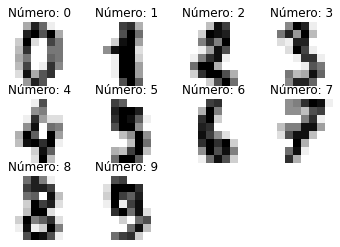

In [7]:
# Retorna tuplas com valores da imagem e o número
images_and_labels = list(zip(digits.images, digits.target))

# Plota
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Número: %i'%label)

Devido ao tamanho da matriz, 8x8, a qualidade das imagens é ruim.

**Convertendo os Dados em DataFrame**

Convertemos os dados de cada imagem em array de uma linha.

In [8]:
# Convertemos os arrays de cada imagem de 2 dimensões para 1 dimensão
n_samples = len(digits.images)
features = digits.images.reshape((n_samples, -1))

print(n_samples, features.shape)
print(features)

1797 (1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [9]:
# O atributo "target" contém os valores de classe
classe = digits.target
classe

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
# Criando um DataFrame com os atributos
dataset = pd.DataFrame(features)

# Adicionando a classe
dataset['classe'] = classe

In [11]:
# Visualizando as primeiras 5 linhas
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


Temos um dataset com 65 colunas, sendo a última a classe. Os atributos 0 até 63 são os valores correspondentes aos pixels, cada valor desses é uma intensidade de pixel baseado na escala de cores. Cada linha se corresponde a uma imagem de um numeral e sua respectiva classe, por exemplo, a primeira amostra de dados corresponde à imagem do numeral 0.

**Dividindo os Dados em Treino e Teste**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('classe', axis = 1), 
                                                    dataset['classe'], 
                                                    test_size = 0.3)

30% de nossos dados serão utilizados para Teste e 70% para Treino.

In [13]:
# Verificando a forma dos dados
X_train.shape, X_test.shape

((1257, 64), (540, 64))

In [14]:
y_train.shape, y_test.shape

((1257,), (540,))

**Instanciando o Algoritmo KNN**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

**Treinando o Algoritmo KNN**

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Fazendo a Predição para as Features de Teste**

In [17]:
result = knn.predict(X_test)
result

array([6, 4, 6, 4, 1, 6, 7, 7, 3, 3, 6, 1, 9, 7, 3, 2, 1, 4, 7, 9, 5, 5,
       6, 6, 5, 2, 7, 0, 4, 1, 6, 6, 7, 3, 2, 8, 8, 9, 0, 5, 7, 4, 4, 8,
       3, 9, 8, 3, 1, 7, 8, 4, 4, 1, 6, 3, 8, 9, 9, 2, 6, 7, 6, 4, 8, 9,
       1, 2, 0, 2, 0, 8, 8, 6, 3, 3, 6, 3, 1, 7, 5, 7, 0, 4, 0, 3, 4, 8,
       3, 1, 5, 1, 1, 1, 6, 0, 2, 9, 0, 9, 3, 6, 3, 8, 9, 7, 4, 9, 2, 4,
       8, 2, 0, 5, 8, 3, 2, 4, 2, 0, 6, 6, 7, 4, 5, 6, 4, 8, 3, 3, 5, 4,
       6, 5, 6, 1, 1, 9, 5, 7, 7, 6, 4, 9, 8, 7, 1, 8, 1, 5, 1, 8, 7, 0,
       5, 5, 1, 1, 3, 4, 6, 7, 1, 2, 5, 5, 8, 9, 7, 1, 5, 4, 1, 4, 0, 3,
       8, 0, 2, 0, 1, 7, 1, 3, 7, 7, 4, 2, 1, 7, 9, 9, 3, 0, 9, 9, 8, 4,
       7, 5, 3, 0, 1, 9, 5, 5, 1, 9, 1, 3, 2, 3, 8, 4, 7, 8, 6, 9, 0, 1,
       2, 0, 8, 4, 6, 2, 1, 8, 4, 5, 0, 4, 4, 7, 6, 8, 9, 6, 4, 7, 1, 2,
       7, 3, 8, 6, 9, 0, 3, 3, 5, 9, 6, 6, 7, 5, 6, 8, 8, 5, 2, 2, 4, 1,
       3, 7, 2, 3, 1, 6, 8, 2, 9, 8, 3, 3, 8, 1, 3, 8, 4, 0, 9, 0, 0, 0,
       1, 7, 3, 1, 6, 7, 5, 6, 1, 5, 7, 6, 6, 6, 5,

## **Técnicas de Validação**

*   **Métricas de Classificação**

In [18]:
from sklearn import metrics
print(metrics.classification_report(y_test, result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.93      1.00      0.97        56
           2       1.00      1.00      1.00        50
           3       0.98      0.97      0.98        61
           4       1.00      1.00      1.00        49
           5       0.98      0.98      0.98        47
           6       0.98      1.00      0.99        60
           7       0.97      0.98      0.97        59
           8       1.00      0.93      0.96        58
           9       0.98      0.96      0.97        50

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



Nosso algoritmo KNN acertou muito bem, com uma precisão média de 0.98. Temos também a precisão por classe, para o dígito 0 ele acertou todas, para o dígito 9 ele errou algumas, 0.98 de precisão. No geral, se comportou muito bem.

*   **Matriz de Confusão**

In [19]:
print(pd.crosstab(y_test, result, rownames = ['Real'], colnames = ['        Predito'], margins = True))

        Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                        
0                50   0   0   0   0   0   0   0   0   0   50
1                 0  56   0   0   0   0   0   0   0   0   56
2                 0   0  50   0   0   0   0   0   0   0   50
3                 0   0   0  59   0   0   0   2   0   0   61
4                 0   0   0   0  49   0   0   0   0   0   49
5                 0   0   0   0   0  46   1   0   0   0   47
6                 0   0   0   0   0   0  60   0   0   0   60
7                 0   0   0   0   0   0   0  58   0   1   59
8                 0   4   0   0   0   0   0   0  54   0   58
9                 0   0   0   1   0   1   0   0   0  48   50
All              50  60  50  60  49  47  61  60  54  49  540


O total das amostras contendo imagens de 0, do conjunto de Teste, foi predito como tal. De 50 amostras contendo imagens do número 9, o algoritmo errou 2, que foram classificadas como 3 e 5.

*   **Cross Validation**

A melhor maneira de fazer uma validação da performance de nosso modelo é através do *Cross Validation*. Isto consiste em separar os dados de Treino e Teste de forma iterativa. O método `cross_val_score` recebe como parâmetros: o algoritmo (knn, neste caso), os dados completos das features, os dados completos da classe, uma métrica para avaliação do modelo e o "cv". Este último divide o conjunto de dados em *k* dobras consecutivas, cada dobra é então usada uma vez como validação, enquanto as *k-1* dobras restantes formam o conjunto de treinamento. Ao final do processo, teremos *k* medidas da métrica de avaliação escolhida, com as quais geralmente se calcula a média e o desvio-padrão.

Essa medida de desempenho é fundamental para ver o comportamento de seu modelo com amostragens diferentes.

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, dataset.drop('classe', axis = 1), dataset['classe'], scoring = "accuracy", cv = 5)

print("Resultado dos k testes:", scores)
print("Média dos testes:", scores.mean())
print("Desvio Padrão dos testes:", scores.std())

Resultado dos k testes: [0.95555556 0.95833333 0.96657382 0.98328691 0.96657382]
Média dos testes: 0.9660646858557721
Desvio Padrão dos testes: 0.009667874607068043


Neste caso, retornamos a precisão (a acurácia é o percentual de acertos que o modelo teve) em cada iteração. Temos uma performance muito boa, ou seja, o algortimo está acertando bastante.

## **Otimização do Parâmetro *k***

Precisamos fazer testes para obter o valor do parâmetro *k* que garanta o melhor desempenho de nosso algoritmo. A ferramenta `GridSearch` permite fazer a otimização de parâmetros de algoritmos de Machine Learning, através de uma busca dos mesmos, e retorna uma faixa de melhores scores.

**Importando o GridSearch**

In [21]:
from sklearn.model_selection import GridSearchCV

**Definindo a Lista de Valores para o Parâmetro**

Especificamos uma lista de valores entre 1 a 30 para o parâmetro *k*, e vemos a performance do algoritmo com cada um desses valores.

In [22]:
k_list = list(range(1, 31))

Criamos um dicionário com a chave `n_neighbors` (*k*) que recebe a lista como valor.

In [23]:
k_values = dict(n_neighbors = k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

**Instanciando o Objeto GridSearch**

Para instanciar o objeto `GridSearch` precisamos do classificador (knn), que já instanciamos e treinamos, os valores de *k* no formato dicionário com a chave `n_neighbors`, a quantidade de folds para fazer o *Cross Validation* e o valor de "scoring" que usaremos para avaliar a performance do algortimo. O `GridSearch` vai fazer vários testes especificando cada um dos valores da lista, utilizando o algoritmo KNN, dividindo em 5 folds e avaliando a acurácia.

In [24]:
# Instanciando o objeto GridSearch e armazenando na variável grid
grid = GridSearchCV(knn, k_values, cv = 5, scoring = 'accuracy')

**Treinando o Objeto**

Treinamos o objeto de forma similar ao treinamento do algoritmo. Para isso, usamos o método `fit` e passamos para ele as features completas do dataset (*X*) e as classes completas (*y*). O próprio `GridSearch` vai fazer a separação dos dados em dados de Treino e dados de Teste, em 5 iterações.

In [25]:
grid.fit(dataset.drop('classe', axis = 1), dataset['classe'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

Poderiamos testar uma combinação de parâmetros para otimizar o modelo. Neste caso, somente estamos testando o parâmetro *k*, através do atributo `n_neighbors`.

**Visualizando os Valores de Scores**

In [26]:
grid.cv_results_

{'mean_fit_time': array([0.01313968, 0.01139407, 0.01182308, 0.01160836, 0.01164379,
        0.0115149 , 0.01131449, 0.011516  , 0.01125636, 0.0114367 ,
        0.01118889, 0.01172695, 0.01121488, 0.01116891, 0.01127157,
        0.0114428 , 0.01115642, 0.01115484, 0.01118584, 0.01121807,
        0.01122489, 0.01140885, 0.01118379, 0.01120882, 0.01123891,
        0.01138148, 0.01115847, 0.01123257, 0.0112009 , 0.01153698]),
 'std_fit_time': array([3.64275725e-03, 2.35533539e-04, 7.37055721e-04, 2.93673705e-04,
        4.37085170e-04, 4.67130109e-04, 1.66476384e-04, 4.02288625e-04,
        5.95555294e-05, 4.15487209e-04, 6.93716293e-05, 7.39923855e-04,
        7.60682463e-05, 4.90900091e-05, 1.34417731e-04, 4.22056421e-04,
        4.99764470e-05, 2.85363834e-05, 2.76279301e-05, 1.11318143e-04,
        5.42446229e-05, 4.71625635e-04, 4.46802778e-05, 9.17495162e-05,
        9.55325842e-05, 4.43179638e-04, 7.28358419e-05, 1.36490203e-04,
        5.03698960e-05, 5.71317454e-04]),
 'mean_scor

Os primeiros valores de acurácia média para o KNN correspondem a *k = 1, 2, ...* e assim por diante.

Para imprimir o melhor valor do parâmetro *k* e a melhor acurácia, usamos os atributos `grid.best_params_` e `grid.best_score_`.

In [27]:
print("O melhor valor de k é: {}, com acurácia de {}".format(grid.best_params_, grid.best_score_))

O melhor valor de k é: {'n_neighbors': 2}, com acurácia de 0.9671711544413494


O valor *k = 2* (fazendo duas comparações de vizinhos) fornece a melhor performance do modelo, ele garante uma acurácia de 0.96717.

**Visualização dos Valores de *k* e da Acurácia**

<IPython.core.display.Javascript object>


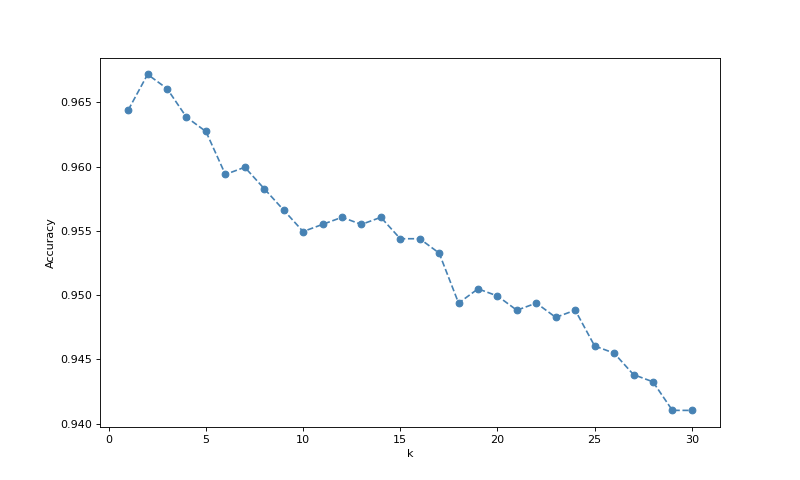

In [29]:
%matplotlib notebook
scores = []
for score in grid.cv_results_['mean_test_score']:
    scores.append(score)
    
plt.figure(figsize = (10, 6))
plt.plot(k_list, scores, color = 'steelblue', linestyle = 'dashed', marker = 'o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

O pico de acurácia corresponde ao parâmetro *k = 2*, fornece a melhor performance de nosso algoritmo KNN, a acurácia cai conforme aumenta o valor de *k*. Então, não adianta aumentar mais o valor de *k*.